**Domain Background**：


        这是一个来自于Kaggle的真实竞赛项目，项目要求预测Rossmann的日常销售。Rossmann是一个在7个欧洲国家经营着3,000多家药店。目前，Rossmann商店经理的任务是预先提前六周预测他们的日常销售。商店销售受许多因素的影响，包括促销，竞争，学校和州假日，季节性和地方性。成千上万的个体经理根据他们独特的情况预测销售情况，结果的准确性可能会有很大差异。
    在Kaggle的比赛中，Rossmann向您提出挑战，要求您预测德国各地的1,115家商店每周销售6周。可靠的销售预测可以使商店经理能够创建有效的员工时间表，从而提高生产力和动力。通过帮助Rossmann创建一个强大的预测模型，您将帮助商店经理专注于对他们最重要的事情：他们的客户和他们的团队！ 
之所以选择这个项目，是因为该项目与我的实际工作中亟待解决的问题同出一辙。


**Problem Statement**：


        该项目的具体任务是在1,115家Rossmann商店的历史销售数据中预测测试集的“Sales”列，这属于线性回归类的需求。可以通过构建一个有监督学习类的模型来减少预测值（ŷ）与实际值（y）之间的误差来解决本需求。
    使用Kaggle的RMSPE 函数来验证真实的销售数据与预测数据的差异性。RMSPE 函数：

<img src="rmspe.png" width="20%"></img>

In [52]:
#导入所需要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from time import time

In [53]:
#读取数据
train = pd.read_csv('train.csv',parse_dates=[2])
test = pd.read_csv('test.csv',parse_dates=[3])
store = pd.read_csv('store.csv')

In [54]:
#查看训练集
train.head().append(train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [55]:
#查看测试集
test.head().append(test.tail())


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [56]:
#查看店铺信息
store.head().append(store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [57]:
#查看数据缺失
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [58]:
#缺失数据分析
#测试集缺失数据
test[pd.isnull(test.Open)]


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


# - 缺失数据都来自于622店铺，从周1到周6而且没有假期，所以我们认为这个店铺的状态应该是正常营业的

In [59]:
#店铺集缺失数据
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [60]:
store[pd.isnull(store.CompetitionOpenSinceMonth)].head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
25,26,d,a,2300.0,NaN,NaN,0,NaN,NaN,NaN
28,29,d,c,2170.0,NaN,NaN,0,NaN,NaN,NaN
31,32,a,a,2910.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
39,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [61]:
#查看是否Promo2系列的缺失是否是因为没有参加促销
NoPW = store[pd.isnull(store.Promo2SinceWeek)]
NoPW[NoPW.Promo2 != 0].shape

(0, 10)

# - 店铺竞争数据缺失的原因不明，且数量比较多，我们可以用中值或者0来填充，后续的实验发现以0填充的效果更好
# - 店铺促销信息的缺失是因为没有参加促销活动，所以我们以0填充


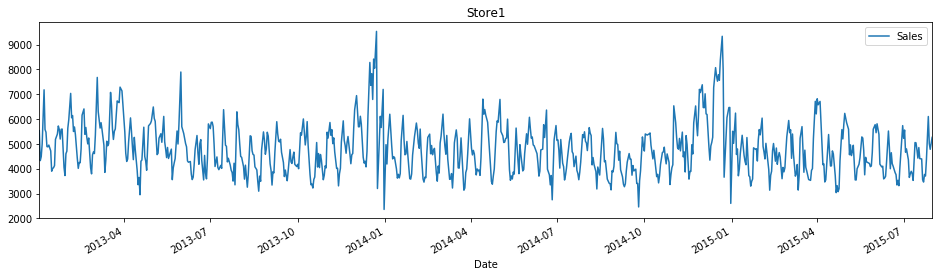

In [62]:

#分析店铺销量随时间的变化
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']]     .plot(x='Date',y='Sales',title='Store1',figsize=(16,4))


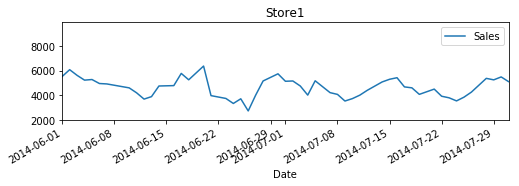

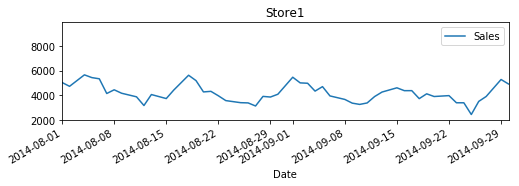

In [63]:
#分析店铺6-9月份的销量变化
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']]     .plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
strain.loc[strain['Store']==1 ,['Date','Sales']]     .plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])


# - 从上图的分析中，我们可以看到店铺的销售额是有周期性变化的，一年之中11，12月份销量要高于其他月份，可能有季节因素或者促销等原因.
# - 此外从对2014年6月-9月份的销量来看，6，7月份的销售趋势与8，9月份类似，因为我们需要预测的6周在2015年8，9月份，因此我们可以把2015年6，7月份最近的6周数据作为hold-out数据集，用于模型的优化和验证。
 
# 2.数据预处理


In [64]:
#缺失值处理
#我们将test中的open数据补为1，即营业状态
test.fillna(1, inplace=True)
#store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
#store['CompetitionOpenScinceYear'].fillna(store['CompetitionDistance'].median(), inplace = True)
#store['CompetitionOPenScinceMonth'].fillna(store['CompetitionDistance'].median(), inplace = True)
 
#store中的缺失数据大多与竞争对手和促销有关，在实验中我们发现竞争对手信息的中值填充效果并不好，所以这里统一采用0填充

store.fillna(0, inplace=True)


In [65]:
#查看是否还存在缺失值
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [66]:
#合并store信息
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

In [67]:
#留出最近的6周数据作为hold_out数据集进行测试
train = train.sort_values(['Date'],ascending = False)
ho_test = train[:6*7*1115]
ho_train = train[6*7*1115:]

In [68]:
#因为销售额为0的记录不计入评分，所以只采用店铺为开，且销售额大于0的数据进行训练
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]



# 3.特征工程

In [69]:
#特征处理与转化，定义特征处理函数
def features_create(data):
    
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data

In [70]:
#对训练，保留以及测试数据集进行特征转化
features_create(ho_train)
features_create(ho_test)
features_create(test)
print('Features creation finished！')

Features creation finished！


In [71]:

#删掉训练和保留数据集中不需要的特征
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)


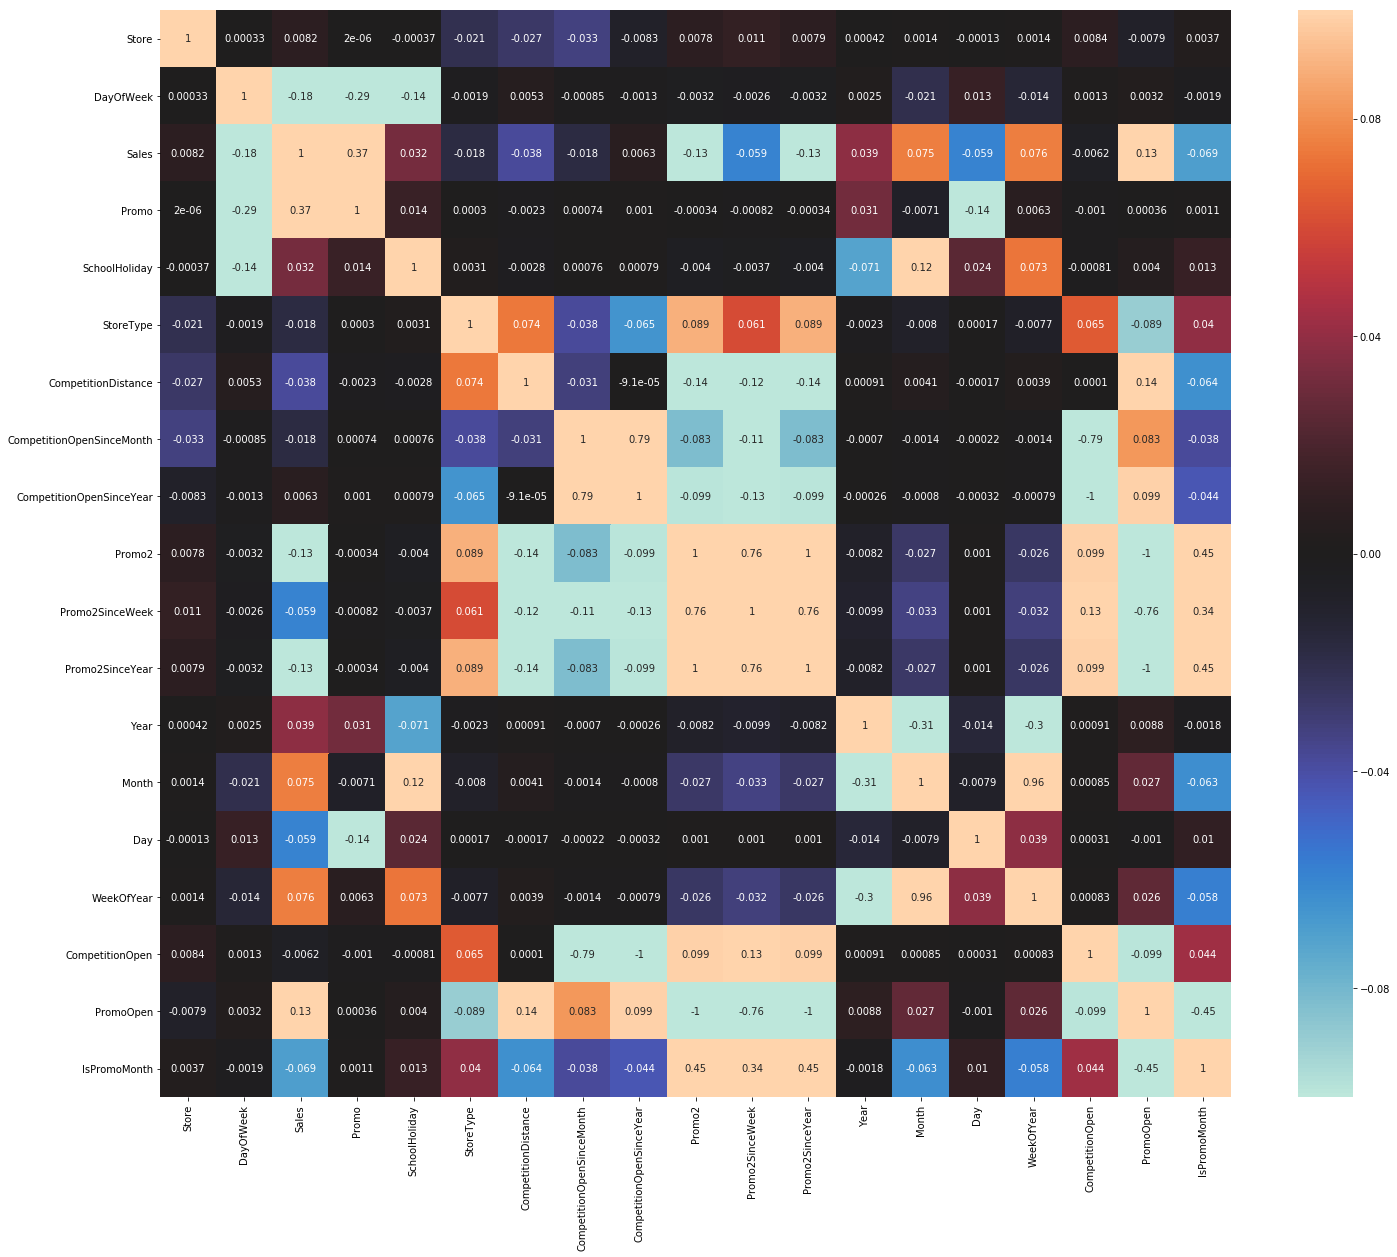

In [72]:
#分析训练数据集中特征相关性以及特征与'Sales'标签相关性
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

In [73]:
#拆分特征与标签，并将标签取对数处理
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

In [75]:
#删掉测试集中对应的特征与训练集保持一致
xtest =test.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)

In [76]:
# 4.
 
#定义评价函数rmspe
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [92]:
ho_xtrain['Assortment']

284584     1
417104     1
875290     3
119580     3
807974     1
856818     1
905823     1
189376     1
478010     3
725586     1
731996     3
675822     1
746332     3
35860      1
457080     1
148068     1
245734     1
256486     1
668654     3
755384     3
173546     1
518354     1
411636     3
874348     1
43028      1
604348     3
290052     3
812500     1
927695     3
883768     1
          ..
688598     3
138030     1
319600     1
265126     1
370858     3
419886     1
938587     1
682946     1
586200     1
148024     1
320542     3
672952     3
757224     1
467215     2
450995     1
512659     3
483619     3
386137     1
615999     2
621467     1
700661     2
667669     2
1000988    2
77677      1
305081     1
864127     2
321485     2
249459     2
235513     2
238339     1
Name: Assortment, Length: 804056, dtype: object

In [ ]:
#通过pd.to_numeric将object类型转换为数值类型的数据。

In [90]:
ho_xtrain['StateHoliday'] = pd.to_numeric(ho_xtrain['StateHoliday'])

In [93]:
ho_xtrain['Assortment'] = pd.to_numeric(ho_xtrain['Assortment'])

In [95]:
ho_xtest['Assortment'] = pd.to_numeric(ho_xtest['Assortment'])

In [96]:
# 5.模型构建
#初始模型构建
#参数设定
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,         "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 6000
 
 
dtrain = xgb.DMatrix(ho_xtrain, ho_ytrain)
dvalid = xgb.DMatrix(ho_xtest, ho_ytest)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [97]:
#模型训练
print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

Train a XGBoost model
[0]	train-rmse:8.02076	eval-rmse:8.02752	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.78059	eval-rmse:7.78778	train-rmspe:0.999711	eval-rmspe:0.999714
[2]	train-rmse:7.54766	eval-rmse:7.55538	train-rmspe:0.999591	eval-rmspe:0.999596
[3]	train-rmse:7.32174	eval-rmse:7.32934	train-rmspe:0.999444	eval-rmspe:0.999451
[4]	train-rmse:7.1026	eval-rmse:7.11034	train-rmspe:0.999267	eval-rmspe:0.999277
[5]	train-rmse:6.89003	eval-rmse:6.89783	train-rmspe:0.999055	eval-rmspe:0.999067
[6]	train-rmse:6.68391	eval-rmse:6.69117	train-rmspe:0.9988	eval-rmspe:0.998814
[7]	train-rmse:6.48396	eval-rmse:6.49097	train-rmspe:0.998498	eval-rmspe:0.998516
[8]	train-rmse:6.28995	eval-rmse:6.29723	train-rmspe:0.998143	eval-rmspe:0.998165
[9]	train-rmse:6.10176	eval-rmse:6.10906	train-rmspe:0.997727	eval-rmspe:0.997754
[10]	train-rmse

[97]	train-rmse:0.489705	eval-rmse:0.484856	train-rmspe:0.379223	eval-rmspe:0.364062
[98]	train-rmse:0.478687	eval-rmse:0.473957	train-rmspe:0.37329	eval-rmspe:0.357693
[99]	train-rmse:0.468199	eval-rmse:0.463559	train-rmspe:0.367635	eval-rmspe:0.351581
[100]	train-rmse:0.457769	eval-rmse:0.453292	train-rmspe:0.362006	eval-rmspe:0.345509
[101]	train-rmse:0.447941	eval-rmse:0.443758	train-rmspe:0.35667	eval-rmspe:0.339851
[102]	train-rmse:0.438544	eval-rmse:0.434339	train-rmspe:0.35153	eval-rmspe:0.334259
[103]	train-rmse:0.429637	eval-rmse:0.425568	train-rmspe:0.34676	eval-rmspe:0.32906
[104]	train-rmse:0.420601	eval-rmse:0.416784	train-rmspe:0.341933	eval-rmspe:0.323802
[105]	train-rmse:0.412332	eval-rmse:0.408303	train-rmspe:0.337537	eval-rmspe:0.318797
[106]	train-rmse:0.403709	eval-rmse:0.399586	train-rmspe:0.332924	eval-rmspe:0.313605
[107]	train-rmse:0.395973	eval-rmse:0.391815	train-rmspe:0.328856	eval-rmspe:0.308996
[108]	train-rmse:0.388112	eval-rmse:0.38414	train-rmspe:0.3247

[193]	train-rmse:0.198547	eval-rmse:0.207687	train-rmspe:0.245051	eval-rmspe:0.219338
[194]	train-rmse:0.19813	eval-rmse:0.207371	train-rmspe:0.244952	eval-rmspe:0.219233
[195]	train-rmse:0.197923	eval-rmse:0.207234	train-rmspe:0.245042	eval-rmspe:0.2193
[196]	train-rmse:0.197699	eval-rmse:0.207068	train-rmspe:0.245149	eval-rmspe:0.21934
[197]	train-rmse:0.19732	eval-rmse:0.206752	train-rmspe:0.244966	eval-rmspe:0.219185
[198]	train-rmse:0.196771	eval-rmse:0.206187	train-rmspe:0.244357	eval-rmspe:0.218865
[199]	train-rmse:0.196476	eval-rmse:0.206069	train-rmspe:0.244214	eval-rmspe:0.219029
[200]	train-rmse:0.196013	eval-rmse:0.205663	train-rmspe:0.243991	eval-rmspe:0.218724
[201]	train-rmse:0.19568	eval-rmse:0.205401	train-rmspe:0.243887	eval-rmspe:0.218639
[202]	train-rmse:0.194834	eval-rmse:0.204667	train-rmspe:0.243128	eval-rmspe:0.217896
[203]	train-rmse:0.194681	eval-rmse:0.204581	train-rmspe:0.243162	eval-rmspe:0.217973
[204]	train-rmse:0.194182	eval-rmse:0.20415	train-rmspe:0.24

[289]	train-rmse:0.15798	eval-rmse:0.172205	train-rmspe:0.207035	eval-rmspe:0.186754
[290]	train-rmse:0.157554	eval-rmse:0.171781	train-rmspe:0.206728	eval-rmspe:0.186311
[291]	train-rmse:0.157239	eval-rmse:0.171507	train-rmspe:0.206319	eval-rmspe:0.186011
[292]	train-rmse:0.157014	eval-rmse:0.171338	train-rmspe:0.205943	eval-rmspe:0.185856
[293]	train-rmse:0.156834	eval-rmse:0.171177	train-rmspe:0.205793	eval-rmspe:0.185681
[294]	train-rmse:0.156736	eval-rmse:0.171234	train-rmspe:0.205635	eval-rmspe:0.185823
[295]	train-rmse:0.156066	eval-rmse:0.170678	train-rmspe:0.204956	eval-rmspe:0.185163
[296]	train-rmse:0.155822	eval-rmse:0.170462	train-rmspe:0.204748	eval-rmspe:0.184932
[297]	train-rmse:0.155264	eval-rmse:0.170012	train-rmspe:0.204265	eval-rmspe:0.184452
[298]	train-rmse:0.155093	eval-rmse:0.169861	train-rmspe:0.204119	eval-rmspe:0.184285
[299]	train-rmse:0.154854	eval-rmse:0.169649	train-rmspe:0.203794	eval-rmspe:0.184049
[300]	train-rmse:0.154296	eval-rmse:0.169172	train-rmsp

[385]	train-rmse:0.135275	eval-rmse:0.152985	train-rmspe:0.179095	eval-rmspe:0.165827
[386]	train-rmse:0.134963	eval-rmse:0.152718	train-rmspe:0.178819	eval-rmspe:0.165531
[387]	train-rmse:0.134815	eval-rmse:0.152612	train-rmspe:0.178471	eval-rmspe:0.165424
[388]	train-rmse:0.13477	eval-rmse:0.152578	train-rmspe:0.17773	eval-rmspe:0.165385
[389]	train-rmse:0.134666	eval-rmse:0.152669	train-rmspe:0.177514	eval-rmspe:0.165569
[390]	train-rmse:0.134561	eval-rmse:0.152763	train-rmspe:0.177355	eval-rmspe:0.165757
[391]	train-rmse:0.134508	eval-rmse:0.152721	train-rmspe:0.177277	eval-rmspe:0.165711
[392]	train-rmse:0.134427	eval-rmse:0.152532	train-rmspe:0.177189	eval-rmspe:0.165528
[393]	train-rmse:0.13427	eval-rmse:0.152402	train-rmspe:0.177052	eval-rmspe:0.165368
[394]	train-rmse:0.134067	eval-rmse:0.152239	train-rmspe:0.176792	eval-rmspe:0.165189
[395]	train-rmse:0.134033	eval-rmse:0.152195	train-rmspe:0.176785	eval-rmspe:0.165156
[396]	train-rmse:0.133682	eval-rmse:0.151892	train-rmspe:

[481]	train-rmse:0.120724	eval-rmse:0.14184	train-rmspe:0.156052	eval-rmspe:0.15409
[482]	train-rmse:0.120607	eval-rmse:0.14168	train-rmspe:0.155947	eval-rmspe:0.153902
[483]	train-rmse:0.120549	eval-rmse:0.141661	train-rmspe:0.155842	eval-rmspe:0.153888
[484]	train-rmse:0.120486	eval-rmse:0.141603	train-rmspe:0.155778	eval-rmspe:0.153832
[485]	train-rmse:0.120416	eval-rmse:0.141549	train-rmspe:0.155717	eval-rmspe:0.153775
[486]	train-rmse:0.120305	eval-rmse:0.141451	train-rmspe:0.155615	eval-rmspe:0.153661
[487]	train-rmse:0.120202	eval-rmse:0.141371	train-rmspe:0.155531	eval-rmspe:0.153571
[488]	train-rmse:0.120112	eval-rmse:0.141301	train-rmspe:0.155444	eval-rmspe:0.153501
[489]	train-rmse:0.119935	eval-rmse:0.141164	train-rmspe:0.155266	eval-rmspe:0.153368
[490]	train-rmse:0.119755	eval-rmse:0.141012	train-rmspe:0.155107	eval-rmspe:0.153183
[491]	train-rmse:0.119688	eval-rmse:0.140964	train-rmspe:0.15505	eval-rmspe:0.153141
[492]	train-rmse:0.119507	eval-rmse:0.140854	train-rmspe:0

[577]	train-rmse:0.112089	eval-rmse:0.135101	train-rmspe:0.138467	eval-rmspe:0.146661
[578]	train-rmse:0.111962	eval-rmse:0.135003	train-rmspe:0.138301	eval-rmspe:0.14655
[579]	train-rmse:0.111913	eval-rmse:0.134967	train-rmspe:0.138255	eval-rmspe:0.146511
[580]	train-rmse:0.111856	eval-rmse:0.134985	train-rmspe:0.138191	eval-rmspe:0.146534
[581]	train-rmse:0.111808	eval-rmse:0.13488	train-rmspe:0.138155	eval-rmspe:0.146396
[582]	train-rmse:0.111774	eval-rmse:0.134854	train-rmspe:0.137787	eval-rmspe:0.14637
[583]	train-rmse:0.111724	eval-rmse:0.134887	train-rmspe:0.137735	eval-rmspe:0.146418
[584]	train-rmse:0.111656	eval-rmse:0.134835	train-rmspe:0.13699	eval-rmspe:0.146367
[585]	train-rmse:0.111565	eval-rmse:0.134766	train-rmspe:0.1369	eval-rmspe:0.146291
[586]	train-rmse:0.111527	eval-rmse:0.134671	train-rmspe:0.13687	eval-rmspe:0.146162
[587]	train-rmse:0.111448	eval-rmse:0.134629	train-rmspe:0.136796	eval-rmspe:0.146118
[588]	train-rmse:0.111376	eval-rmse:0.13455	train-rmspe:0.136

[673]	train-rmse:0.105817	eval-rmse:0.130902	train-rmspe:0.124401	eval-rmspe:0.142132
[674]	train-rmse:0.105773	eval-rmse:0.130869	train-rmspe:0.124355	eval-rmspe:0.142097
[675]	train-rmse:0.105623	eval-rmse:0.13078	train-rmspe:0.124207	eval-rmspe:0.141993
[676]	train-rmse:0.105592	eval-rmse:0.13076	train-rmspe:0.124177	eval-rmspe:0.141968
[677]	train-rmse:0.105536	eval-rmse:0.130714	train-rmspe:0.124122	eval-rmspe:0.141914
[678]	train-rmse:0.105492	eval-rmse:0.130693	train-rmspe:0.12408	eval-rmspe:0.141894
[679]	train-rmse:0.10546	eval-rmse:0.13068	train-rmspe:0.124052	eval-rmspe:0.141883
[680]	train-rmse:0.10537	eval-rmse:0.13062	train-rmspe:0.123967	eval-rmspe:0.141819
[681]	train-rmse:0.105299	eval-rmse:0.13058	train-rmspe:0.123902	eval-rmspe:0.141779
[682]	train-rmse:0.105166	eval-rmse:0.130506	train-rmspe:0.123768	eval-rmspe:0.14169
[683]	train-rmse:0.105134	eval-rmse:0.130487	train-rmspe:0.123736	eval-rmspe:0.141669
[684]	train-rmse:0.105085	eval-rmse:0.130456	train-rmspe:0.1236

[769]	train-rmse:0.100293	eval-rmse:0.127582	train-rmspe:0.11828	eval-rmspe:0.13855
[770]	train-rmse:0.100256	eval-rmse:0.127578	train-rmspe:0.118245	eval-rmspe:0.138551
[771]	train-rmse:0.100188	eval-rmse:0.127544	train-rmspe:0.118168	eval-rmspe:0.138518
[772]	train-rmse:0.100132	eval-rmse:0.127506	train-rmspe:0.118092	eval-rmspe:0.138482
[773]	train-rmse:0.100093	eval-rmse:0.12748	train-rmspe:0.118058	eval-rmspe:0.138456
[774]	train-rmse:0.100051	eval-rmse:0.127468	train-rmspe:0.118013	eval-rmspe:0.138442
[775]	train-rmse:0.100003	eval-rmse:0.12744	train-rmspe:0.117967	eval-rmspe:0.138412
[776]	train-rmse:0.099982	eval-rmse:0.127431	train-rmspe:0.117946	eval-rmspe:0.138403
[777]	train-rmse:0.099933	eval-rmse:0.127416	train-rmspe:0.117899	eval-rmspe:0.138384
[778]	train-rmse:0.099891	eval-rmse:0.127383	train-rmspe:0.11786	eval-rmspe:0.138344
[779]	train-rmse:0.099841	eval-rmse:0.127306	train-rmspe:0.117789	eval-rmspe:0.138253
[780]	train-rmse:0.099779	eval-rmse:0.127271	train-rmspe:0.

[865]	train-rmse:0.095814	eval-rmse:0.124993	train-rmspe:0.112654	eval-rmspe:0.13572
[866]	train-rmse:0.09578	eval-rmse:0.124973	train-rmspe:0.112623	eval-rmspe:0.135699
[867]	train-rmse:0.095759	eval-rmse:0.124982	train-rmspe:0.112601	eval-rmspe:0.135711
[868]	train-rmse:0.095747	eval-rmse:0.124975	train-rmspe:0.112467	eval-rmspe:0.135704
[869]	train-rmse:0.095719	eval-rmse:0.124961	train-rmspe:0.112441	eval-rmspe:0.135694
[870]	train-rmse:0.095623	eval-rmse:0.1249	train-rmspe:0.112357	eval-rmspe:0.135627
[871]	train-rmse:0.095588	eval-rmse:0.124884	train-rmspe:0.112326	eval-rmspe:0.135612
[872]	train-rmse:0.095555	eval-rmse:0.124845	train-rmspe:0.112293	eval-rmspe:0.135571
[873]	train-rmse:0.095475	eval-rmse:0.124801	train-rmspe:0.112217	eval-rmspe:0.13552
[874]	train-rmse:0.095429	eval-rmse:0.124809	train-rmspe:0.112169	eval-rmspe:0.135516
[875]	train-rmse:0.09537	eval-rmse:0.124773	train-rmspe:0.112114	eval-rmspe:0.135476
[876]	train-rmse:0.095349	eval-rmse:0.12477	train-rmspe:0.11

[961]	train-rmse:0.092516	eval-rmse:0.123351	train-rmspe:0.108754	eval-rmspe:0.133861
[962]	train-rmse:0.092497	eval-rmse:0.123344	train-rmspe:0.108733	eval-rmspe:0.13385
[963]	train-rmse:0.092481	eval-rmse:0.123337	train-rmspe:0.108717	eval-rmspe:0.133847
[964]	train-rmse:0.092441	eval-rmse:0.12331	train-rmspe:0.108633	eval-rmspe:0.133818
[965]	train-rmse:0.092434	eval-rmse:0.123298	train-rmspe:0.108629	eval-rmspe:0.133796
[966]	train-rmse:0.092384	eval-rmse:0.123277	train-rmspe:0.108579	eval-rmspe:0.133771
[967]	train-rmse:0.092348	eval-rmse:0.123264	train-rmspe:0.108545	eval-rmspe:0.133756
[968]	train-rmse:0.092298	eval-rmse:0.123232	train-rmspe:0.108496	eval-rmspe:0.133725
[969]	train-rmse:0.092273	eval-rmse:0.123222	train-rmspe:0.108457	eval-rmspe:0.133715
[970]	train-rmse:0.092246	eval-rmse:0.123216	train-rmspe:0.108427	eval-rmspe:0.133714
[971]	train-rmse:0.092235	eval-rmse:0.123188	train-rmspe:0.108411	eval-rmspe:0.133679
[972]	train-rmse:0.092213	eval-rmse:0.12319	train-rmspe:

[1057]	train-rmse:0.089691	eval-rmse:0.12216	train-rmspe:0.104549	eval-rmspe:0.132599
[1058]	train-rmse:0.089666	eval-rmse:0.122156	train-rmspe:0.104512	eval-rmspe:0.132594
[1059]	train-rmse:0.089638	eval-rmse:0.122143	train-rmspe:0.104485	eval-rmspe:0.132578
[1060]	train-rmse:0.08962	eval-rmse:0.122139	train-rmspe:0.104464	eval-rmspe:0.132574
[1061]	train-rmse:0.089601	eval-rmse:0.122128	train-rmspe:0.104446	eval-rmspe:0.132561
[1062]	train-rmse:0.089558	eval-rmse:0.122104	train-rmspe:0.104402	eval-rmspe:0.132538
[1063]	train-rmse:0.08951	eval-rmse:0.122075	train-rmspe:0.104356	eval-rmspe:0.13251
[1064]	train-rmse:0.089498	eval-rmse:0.122062	train-rmspe:0.104346	eval-rmspe:0.132494
[1065]	train-rmse:0.089471	eval-rmse:0.12205	train-rmspe:0.104303	eval-rmspe:0.132481
[1066]	train-rmse:0.089449	eval-rmse:0.122043	train-rmspe:0.10428	eval-rmspe:0.132479
[1067]	train-rmse:0.089427	eval-rmse:0.122039	train-rmspe:0.10426	eval-rmspe:0.132475
[1068]	train-rmse:0.089395	eval-rmse:0.122022	trai

[1152]	train-rmse:0.087409	eval-rmse:0.121251	train-rmspe:0.10111	eval-rmspe:0.131615
[1153]	train-rmse:0.087391	eval-rmse:0.121251	train-rmspe:0.101092	eval-rmspe:0.131615
[1154]	train-rmse:0.087382	eval-rmse:0.121246	train-rmspe:0.101093	eval-rmspe:0.131611
[1155]	train-rmse:0.08736	eval-rmse:0.121236	train-rmspe:0.101063	eval-rmspe:0.131596
[1156]	train-rmse:0.087344	eval-rmse:0.121233	train-rmspe:0.101047	eval-rmspe:0.131592
[1157]	train-rmse:0.08731	eval-rmse:0.121207	train-rmspe:0.10101	eval-rmspe:0.131562
[1158]	train-rmse:0.087284	eval-rmse:0.121198	train-rmspe:0.10098	eval-rmspe:0.131553
[1159]	train-rmse:0.087275	eval-rmse:0.121185	train-rmspe:0.100972	eval-rmspe:0.131535
[1160]	train-rmse:0.08724	eval-rmse:0.121171	train-rmspe:0.100938	eval-rmspe:0.131525
[1161]	train-rmse:0.087216	eval-rmse:0.121158	train-rmspe:0.100846	eval-rmspe:0.131511
[1162]	train-rmse:0.087194	eval-rmse:0.121152	train-rmspe:0.100821	eval-rmspe:0.131503
[1163]	train-rmse:0.08718	eval-rmse:0.121147	trai

[1247]	train-rmse:0.085542	eval-rmse:0.120692	train-rmspe:0.098182	eval-rmspe:0.131033
[1248]	train-rmse:0.085514	eval-rmse:0.12068	train-rmspe:0.098153	eval-rmspe:0.131019
[1249]	train-rmse:0.085501	eval-rmse:0.120681	train-rmspe:0.098133	eval-rmspe:0.131019
[1250]	train-rmse:0.085476	eval-rmse:0.120668	train-rmspe:0.098107	eval-rmspe:0.131007
[1251]	train-rmse:0.085457	eval-rmse:0.120661	train-rmspe:0.098088	eval-rmspe:0.130999
[1252]	train-rmse:0.085433	eval-rmse:0.120651	train-rmspe:0.098061	eval-rmspe:0.130988
[1253]	train-rmse:0.085412	eval-rmse:0.12064	train-rmspe:0.098043	eval-rmspe:0.130978
[1254]	train-rmse:0.085398	eval-rmse:0.120637	train-rmspe:0.098026	eval-rmspe:0.130981
[1255]	train-rmse:0.085393	eval-rmse:0.120633	train-rmspe:0.098024	eval-rmspe:0.130974
[1256]	train-rmse:0.085387	eval-rmse:0.120632	train-rmspe:0.098018	eval-rmspe:0.130974
[1257]	train-rmse:0.085368	eval-rmse:0.120623	train-rmspe:0.097994	eval-rmspe:0.13096
[1258]	train-rmse:0.085352	eval-rmse:0.120623	

[1342]	train-rmse:0.083746	eval-rmse:0.120152	train-rmspe:0.095718	eval-rmspe:0.130454
[1343]	train-rmse:0.08372	eval-rmse:0.120147	train-rmspe:0.095664	eval-rmspe:0.130449
[1344]	train-rmse:0.083695	eval-rmse:0.120136	train-rmspe:0.09564	eval-rmspe:0.130438
[1345]	train-rmse:0.083683	eval-rmse:0.12013	train-rmspe:0.095629	eval-rmspe:0.130433
[1346]	train-rmse:0.083661	eval-rmse:0.120121	train-rmspe:0.095585	eval-rmspe:0.130428
[1347]	train-rmse:0.08365	eval-rmse:0.120108	train-rmspe:0.095569	eval-rmspe:0.130409
[1348]	train-rmse:0.083628	eval-rmse:0.120106	train-rmspe:0.095548	eval-rmspe:0.13041
[1349]	train-rmse:0.083612	eval-rmse:0.12011	train-rmspe:0.095519	eval-rmspe:0.130417
[1350]	train-rmse:0.083602	eval-rmse:0.120102	train-rmspe:0.095508	eval-rmspe:0.13041
[1351]	train-rmse:0.083592	eval-rmse:0.120101	train-rmspe:0.095498	eval-rmspe:0.13041
[1352]	train-rmse:0.083577	eval-rmse:0.120098	train-rmspe:0.095484	eval-rmspe:0.130406
[1353]	train-rmse:0.083561	eval-rmse:0.120094	train

[1437]	train-rmse:0.082169	eval-rmse:0.119844	train-rmspe:0.093402	eval-rmspe:0.130118
[1438]	train-rmse:0.082156	eval-rmse:0.119839	train-rmspe:0.093386	eval-rmspe:0.130113
[1439]	train-rmse:0.082135	eval-rmse:0.119829	train-rmspe:0.093357	eval-rmspe:0.130104
[1440]	train-rmse:0.082108	eval-rmse:0.119819	train-rmspe:0.093318	eval-rmspe:0.130096
[1441]	train-rmse:0.082087	eval-rmse:0.11981	train-rmspe:0.093296	eval-rmspe:0.130089
[1442]	train-rmse:0.082076	eval-rmse:0.119807	train-rmspe:0.093281	eval-rmspe:0.130085
[1443]	train-rmse:0.082054	eval-rmse:0.119799	train-rmspe:0.093257	eval-rmspe:0.130076
[1444]	train-rmse:0.082034	eval-rmse:0.119813	train-rmspe:0.09323	eval-rmspe:0.130088
[1445]	train-rmse:0.081999	eval-rmse:0.119791	train-rmspe:0.093199	eval-rmspe:0.130065
[1446]	train-rmse:0.081986	eval-rmse:0.119785	train-rmspe:0.093187	eval-rmspe:0.130058
[1447]	train-rmse:0.081972	eval-rmse:0.119779	train-rmspe:0.093165	eval-rmspe:0.130051
[1448]	train-rmse:0.081962	eval-rmse:0.119783

[1532]	train-rmse:0.080691	eval-rmse:0.119432	train-rmspe:0.09108	eval-rmspe:0.129683
[1533]	train-rmse:0.080674	eval-rmse:0.119423	train-rmspe:0.09106	eval-rmspe:0.129674
[1534]	train-rmse:0.080653	eval-rmse:0.119415	train-rmspe:0.091041	eval-rmspe:0.12967
[1535]	train-rmse:0.080639	eval-rmse:0.119414	train-rmspe:0.091025	eval-rmspe:0.129671
[1536]	train-rmse:0.08063	eval-rmse:0.119409	train-rmspe:0.091013	eval-rmspe:0.129665
[1537]	train-rmse:0.08062	eval-rmse:0.119412	train-rmspe:0.091002	eval-rmspe:0.12967
[1538]	train-rmse:0.080606	eval-rmse:0.119407	train-rmspe:0.090983	eval-rmspe:0.129666
[1539]	train-rmse:0.080589	eval-rmse:0.119402	train-rmspe:0.09096	eval-rmspe:0.129655
[1540]	train-rmse:0.080586	eval-rmse:0.119399	train-rmspe:0.090962	eval-rmspe:0.129651
[1541]	train-rmse:0.080574	eval-rmse:0.119395	train-rmspe:0.090948	eval-rmspe:0.129647
[1542]	train-rmse:0.080564	eval-rmse:0.119395	train-rmspe:0.090938	eval-rmspe:0.129646
[1543]	train-rmse:0.080549	eval-rmse:0.119388	trai

[1627]	train-rmse:0.079377	eval-rmse:0.119122	train-rmspe:0.089013	eval-rmspe:0.129338
[1628]	train-rmse:0.079368	eval-rmse:0.119122	train-rmspe:0.089004	eval-rmspe:0.129337
[1629]	train-rmse:0.07936	eval-rmse:0.11912	train-rmspe:0.088993	eval-rmspe:0.129336
[1630]	train-rmse:0.079351	eval-rmse:0.119131	train-rmspe:0.088981	eval-rmspe:0.129346
[1631]	train-rmse:0.079343	eval-rmse:0.119128	train-rmspe:0.088936	eval-rmspe:0.129344
[1632]	train-rmse:0.079328	eval-rmse:0.119119	train-rmspe:0.088914	eval-rmspe:0.129332
[1633]	train-rmse:0.079314	eval-rmse:0.119117	train-rmspe:0.0889	eval-rmspe:0.129332
[1634]	train-rmse:0.079295	eval-rmse:0.119104	train-rmspe:0.08888	eval-rmspe:0.129317
[1635]	train-rmse:0.079281	eval-rmse:0.119094	train-rmspe:0.088862	eval-rmspe:0.129309
[1636]	train-rmse:0.079262	eval-rmse:0.119084	train-rmspe:0.088842	eval-rmspe:0.1293
[1637]	train-rmse:0.079251	eval-rmse:0.119084	train-rmspe:0.088833	eval-rmspe:0.129298
[1638]	train-rmse:0.079244	eval-rmse:0.119081	trai

[1722]	train-rmse:0.078245	eval-rmse:0.118831	train-rmspe:0.087389	eval-rmspe:0.129047
[1723]	train-rmse:0.078228	eval-rmse:0.118824	train-rmspe:0.087325	eval-rmspe:0.129041
[1724]	train-rmse:0.078213	eval-rmse:0.118827	train-rmspe:0.087301	eval-rmspe:0.129045
[1725]	train-rmse:0.078205	eval-rmse:0.118825	train-rmspe:0.087292	eval-rmspe:0.129043
[1726]	train-rmse:0.078188	eval-rmse:0.11883	train-rmspe:0.087273	eval-rmspe:0.129048
[1727]	train-rmse:0.078177	eval-rmse:0.118824	train-rmspe:0.087263	eval-rmspe:0.12904
[1728]	train-rmse:0.078167	eval-rmse:0.118819	train-rmspe:0.087253	eval-rmspe:0.129035
[1729]	train-rmse:0.078158	eval-rmse:0.118811	train-rmspe:0.087244	eval-rmspe:0.129021
[1730]	train-rmse:0.078142	eval-rmse:0.118805	train-rmspe:0.087195	eval-rmspe:0.129013
[1731]	train-rmse:0.078119	eval-rmse:0.11884	train-rmspe:0.087155	eval-rmspe:0.129061
[1732]	train-rmse:0.078097	eval-rmse:0.118831	train-rmspe:0.087131	eval-rmspe:0.12905
[1733]	train-rmse:0.078077	eval-rmse:0.118821	t

[1817]	train-rmse:0.07708	eval-rmse:0.118625	train-rmspe:0.085649	eval-rmspe:0.128845
[1818]	train-rmse:0.077067	eval-rmse:0.118625	train-rmspe:0.085609	eval-rmspe:0.128846
[1819]	train-rmse:0.077055	eval-rmse:0.118625	train-rmspe:0.085579	eval-rmspe:0.128845
[1820]	train-rmse:0.077045	eval-rmse:0.118623	train-rmspe:0.085568	eval-rmspe:0.128844
[1821]	train-rmse:0.077029	eval-rmse:0.118617	train-rmspe:0.085529	eval-rmspe:0.128838
[1822]	train-rmse:0.077024	eval-rmse:0.118615	train-rmspe:0.085523	eval-rmspe:0.128836
[1823]	train-rmse:0.077014	eval-rmse:0.118612	train-rmspe:0.085513	eval-rmspe:0.128833
[1824]	train-rmse:0.077001	eval-rmse:0.11861	train-rmspe:0.085498	eval-rmspe:0.128831
[1825]	train-rmse:0.076989	eval-rmse:0.118608	train-rmspe:0.085485	eval-rmspe:0.12883
[1826]	train-rmse:0.07698	eval-rmse:0.118606	train-rmspe:0.085474	eval-rmspe:0.128828
[1827]	train-rmse:0.07697	eval-rmse:0.118604	train-rmspe:0.085459	eval-rmspe:0.128824
[1828]	train-rmse:0.076959	eval-rmse:0.118599	tr

[1912]	train-rmse:0.076016	eval-rmse:0.118414	train-rmspe:0.084055	eval-rmspe:0.128637
[1913]	train-rmse:0.076006	eval-rmse:0.118407	train-rmspe:0.08404	eval-rmspe:0.128629
[1914]	train-rmse:0.075998	eval-rmse:0.118409	train-rmspe:0.084032	eval-rmspe:0.128629
[1915]	train-rmse:0.075984	eval-rmse:0.118403	train-rmspe:0.084019	eval-rmspe:0.128623
[1916]	train-rmse:0.075975	eval-rmse:0.1184	train-rmspe:0.08401	eval-rmspe:0.12862
[1917]	train-rmse:0.075962	eval-rmse:0.118395	train-rmspe:0.083995	eval-rmspe:0.128616
[1918]	train-rmse:0.07595	eval-rmse:0.118394	train-rmspe:0.083977	eval-rmspe:0.128615
[1919]	train-rmse:0.075938	eval-rmse:0.118394	train-rmspe:0.083965	eval-rmspe:0.128614
[1920]	train-rmse:0.075931	eval-rmse:0.118392	train-rmspe:0.083957	eval-rmspe:0.128611
[1921]	train-rmse:0.075923	eval-rmse:0.118392	train-rmspe:0.083948	eval-rmspe:0.128612
[1922]	train-rmse:0.075912	eval-rmse:0.118403	train-rmspe:0.083935	eval-rmspe:0.128623
[1923]	train-rmse:0.075897	eval-rmse:0.118401	tra

[2007]	train-rmse:0.075002	eval-rmse:0.118214	train-rmspe:0.082151	eval-rmspe:0.128431
[2008]	train-rmse:0.074994	eval-rmse:0.118217	train-rmspe:0.08214	eval-rmspe:0.128434
[2009]	train-rmse:0.074984	eval-rmse:0.118212	train-rmspe:0.082124	eval-rmspe:0.128427
[2010]	train-rmse:0.074965	eval-rmse:0.118206	train-rmspe:0.082105	eval-rmspe:0.128422
[2011]	train-rmse:0.074961	eval-rmse:0.118207	train-rmspe:0.082101	eval-rmspe:0.128423
[2012]	train-rmse:0.074948	eval-rmse:0.118203	train-rmspe:0.082088	eval-rmspe:0.128418
[2013]	train-rmse:0.074938	eval-rmse:0.1182	train-rmspe:0.082076	eval-rmspe:0.128415
[2014]	train-rmse:0.074924	eval-rmse:0.118195	train-rmspe:0.082061	eval-rmspe:0.128409
[2015]	train-rmse:0.074916	eval-rmse:0.118193	train-rmspe:0.082053	eval-rmspe:0.128408
[2016]	train-rmse:0.074906	eval-rmse:0.118194	train-rmspe:0.082041	eval-rmspe:0.128407
[2017]	train-rmse:0.074897	eval-rmse:0.118191	train-rmspe:0.082026	eval-rmspe:0.128402
[2018]	train-rmse:0.074885	eval-rmse:0.118184	

[2102]	train-rmse:0.074045	eval-rmse:0.11802	train-rmspe:0.080613	eval-rmspe:0.128221
[2103]	train-rmse:0.074032	eval-rmse:0.118008	train-rmspe:0.080595	eval-rmspe:0.128194
[2104]	train-rmse:0.074027	eval-rmse:0.118005	train-rmspe:0.08059	eval-rmspe:0.128191
[2105]	train-rmse:0.074018	eval-rmse:0.118003	train-rmspe:0.080581	eval-rmspe:0.128188
[2106]	train-rmse:0.07401	eval-rmse:0.118004	train-rmspe:0.080571	eval-rmspe:0.12819
[2107]	train-rmse:0.074001	eval-rmse:0.117997	train-rmspe:0.080558	eval-rmspe:0.128182
[2108]	train-rmse:0.07399	eval-rmse:0.117991	train-rmspe:0.080547	eval-rmspe:0.128171
[2109]	train-rmse:0.073981	eval-rmse:0.117988	train-rmspe:0.080535	eval-rmspe:0.128169
[2110]	train-rmse:0.073964	eval-rmse:0.117983	train-rmspe:0.080509	eval-rmspe:0.128165
[2111]	train-rmse:0.073957	eval-rmse:0.117981	train-rmspe:0.080501	eval-rmspe:0.128164
[2112]	train-rmse:0.073947	eval-rmse:0.117981	train-rmspe:0.080488	eval-rmspe:0.128163
[2113]	train-rmse:0.07394	eval-rmse:0.117982	tra

[2197]	train-rmse:0.07316	eval-rmse:0.117804	train-rmspe:0.079389	eval-rmspe:0.12797
[2198]	train-rmse:0.073148	eval-rmse:0.117802	train-rmspe:0.079378	eval-rmspe:0.127968
[2199]	train-rmse:0.073143	eval-rmse:0.1178	train-rmspe:0.079372	eval-rmspe:0.127962
[2200]	train-rmse:0.07313	eval-rmse:0.117797	train-rmspe:0.079359	eval-rmspe:0.127961
[2201]	train-rmse:0.073116	eval-rmse:0.117796	train-rmspe:0.079336	eval-rmspe:0.12796
[2202]	train-rmse:0.073102	eval-rmse:0.117787	train-rmspe:0.079315	eval-rmspe:0.127948
[2203]	train-rmse:0.073098	eval-rmse:0.117784	train-rmspe:0.079311	eval-rmspe:0.127945
[2204]	train-rmse:0.073084	eval-rmse:0.11778	train-rmspe:0.079293	eval-rmspe:0.127941
[2205]	train-rmse:0.073074	eval-rmse:0.117779	train-rmspe:0.079281	eval-rmspe:0.127939
[2206]	train-rmse:0.073068	eval-rmse:0.117774	train-rmspe:0.079278	eval-rmspe:0.127935
[2207]	train-rmse:0.073053	eval-rmse:0.117774	train-rmspe:0.079262	eval-rmspe:0.127935
[2208]	train-rmse:0.073045	eval-rmse:0.117774	trai

[2292]	train-rmse:0.072314	eval-rmse:0.117752	train-rmspe:0.078304	eval-rmspe:0.127931
[2293]	train-rmse:0.072308	eval-rmse:0.117753	train-rmspe:0.078297	eval-rmspe:0.127931
[2294]	train-rmse:0.072296	eval-rmse:0.11775	train-rmspe:0.078284	eval-rmspe:0.127926
[2295]	train-rmse:0.072289	eval-rmse:0.117746	train-rmspe:0.078273	eval-rmspe:0.127923
[2296]	train-rmse:0.072282	eval-rmse:0.117744	train-rmspe:0.078266	eval-rmspe:0.12792
[2297]	train-rmse:0.072278	eval-rmse:0.117745	train-rmspe:0.078261	eval-rmspe:0.127921
[2298]	train-rmse:0.072274	eval-rmse:0.11775	train-rmspe:0.078257	eval-rmspe:0.127928
[2299]	train-rmse:0.072267	eval-rmse:0.117747	train-rmspe:0.07825	eval-rmspe:0.127925
[2300]	train-rmse:0.072257	eval-rmse:0.117746	train-rmspe:0.078236	eval-rmspe:0.127922
[2301]	train-rmse:0.072254	eval-rmse:0.117744	train-rmspe:0.078233	eval-rmspe:0.12792
[2302]	train-rmse:0.072248	eval-rmse:0.117744	train-rmspe:0.078226	eval-rmspe:0.127921
[2303]	train-rmse:0.072236	eval-rmse:0.117739	tr

[2387]	train-rmse:0.071512	eval-rmse:0.117672	train-rmspe:0.077198	eval-rmspe:0.127831
[2388]	train-rmse:0.071502	eval-rmse:0.117671	train-rmspe:0.077187	eval-rmspe:0.127829
[2389]	train-rmse:0.071494	eval-rmse:0.117671	train-rmspe:0.077178	eval-rmspe:0.127829
[2390]	train-rmse:0.071487	eval-rmse:0.117669	train-rmspe:0.07717	eval-rmspe:0.127828
[2391]	train-rmse:0.07148	eval-rmse:0.117666	train-rmspe:0.077163	eval-rmspe:0.127826
[2392]	train-rmse:0.071469	eval-rmse:0.117666	train-rmspe:0.077147	eval-rmspe:0.127826
[2393]	train-rmse:0.071458	eval-rmse:0.117665	train-rmspe:0.077128	eval-rmspe:0.127825
[2394]	train-rmse:0.071453	eval-rmse:0.117665	train-rmspe:0.077122	eval-rmspe:0.127826
[2395]	train-rmse:0.071446	eval-rmse:0.117665	train-rmspe:0.077114	eval-rmspe:0.127825
[2396]	train-rmse:0.071437	eval-rmse:0.117665	train-rmspe:0.077103	eval-rmspe:0.127827
[2397]	train-rmse:0.071424	eval-rmse:0.11766	train-rmspe:0.077089	eval-rmspe:0.12782
[2398]	train-rmse:0.071414	eval-rmse:0.117658	t

[2482]	train-rmse:0.070701	eval-rmse:0.1176	train-rmspe:0.076111	eval-rmspe:0.127785
[2483]	train-rmse:0.07069	eval-rmse:0.117597	train-rmspe:0.076096	eval-rmspe:0.127783
[2484]	train-rmse:0.070679	eval-rmse:0.117599	train-rmspe:0.076082	eval-rmspe:0.127787
[2485]	train-rmse:0.070668	eval-rmse:0.117602	train-rmspe:0.07607	eval-rmspe:0.12779
[2486]	train-rmse:0.070659	eval-rmse:0.1176	train-rmspe:0.076059	eval-rmspe:0.127789
[2487]	train-rmse:0.070653	eval-rmse:0.1176	train-rmspe:0.076053	eval-rmspe:0.12779
[2488]	train-rmse:0.070645	eval-rmse:0.117614	train-rmspe:0.076039	eval-rmspe:0.127811
[2489]	train-rmse:0.07064	eval-rmse:0.117616	train-rmspe:0.076035	eval-rmspe:0.127814
[2490]	train-rmse:0.070633	eval-rmse:0.117619	train-rmspe:0.076026	eval-rmspe:0.127818
[2491]	train-rmse:0.070625	eval-rmse:0.117618	train-rmspe:0.076012	eval-rmspe:0.127816
[2492]	train-rmse:0.070619	eval-rmse:0.117616	train-rmspe:0.076006	eval-rmspe:0.127815
[2493]	train-rmse:0.070615	eval-rmse:0.117616	train-rm

[2577]	train-rmse:0.069927	eval-rmse:0.117566	train-rmspe:0.075054	eval-rmspe:0.127785
[2578]	train-rmse:0.06992	eval-rmse:0.11757	train-rmspe:0.075046	eval-rmspe:0.12779
[2579]	train-rmse:0.069915	eval-rmse:0.11757	train-rmspe:0.07504	eval-rmspe:0.12779
[2580]	train-rmse:0.069905	eval-rmse:0.117566	train-rmspe:0.075029	eval-rmspe:0.127786
[2581]	train-rmse:0.0699	eval-rmse:0.117565	train-rmspe:0.075021	eval-rmspe:0.127784
[2582]	train-rmse:0.069889	eval-rmse:0.117563	train-rmspe:0.075002	eval-rmspe:0.127782
[2583]	train-rmse:0.069881	eval-rmse:0.117562	train-rmspe:0.074994	eval-rmspe:0.127782
[2584]	train-rmse:0.069875	eval-rmse:0.117562	train-rmspe:0.074987	eval-rmspe:0.127781
[2585]	train-rmse:0.069867	eval-rmse:0.117562	train-rmspe:0.074979	eval-rmspe:0.127781
[2586]	train-rmse:0.069856	eval-rmse:0.11756	train-rmspe:0.074968	eval-rmspe:0.12778
[2587]	train-rmse:0.069848	eval-rmse:0.117561	train-rmspe:0.074957	eval-rmspe:0.127782
[2588]	train-rmse:0.069843	eval-rmse:0.117556	train-r

[2672]	train-rmse:0.069221	eval-rmse:0.117509	train-rmspe:0.074152	eval-rmspe:0.127731
[2673]	train-rmse:0.069213	eval-rmse:0.117508	train-rmspe:0.074143	eval-rmspe:0.127728
[2674]	train-rmse:0.069206	eval-rmse:0.117507	train-rmspe:0.074134	eval-rmspe:0.127726
[2675]	train-rmse:0.069199	eval-rmse:0.117508	train-rmspe:0.074125	eval-rmspe:0.127727
[2676]	train-rmse:0.069191	eval-rmse:0.117506	train-rmspe:0.074115	eval-rmspe:0.127724
[2677]	train-rmse:0.069184	eval-rmse:0.117504	train-rmspe:0.074108	eval-rmspe:0.127722
[2678]	train-rmse:0.069177	eval-rmse:0.117503	train-rmspe:0.074101	eval-rmspe:0.127721
[2679]	train-rmse:0.069172	eval-rmse:0.117503	train-rmspe:0.074096	eval-rmspe:0.127722
[2680]	train-rmse:0.069169	eval-rmse:0.117502	train-rmspe:0.074092	eval-rmspe:0.12772
[2681]	train-rmse:0.06916	eval-rmse:0.117504	train-rmspe:0.074079	eval-rmspe:0.127722
[2682]	train-rmse:0.06915	eval-rmse:0.117505	train-rmspe:0.074063	eval-rmspe:0.127723
[2683]	train-rmse:0.06914	eval-rmse:0.117502	t

[2767]	train-rmse:0.068509	eval-rmse:0.117429	train-rmspe:0.073119	eval-rmspe:0.127655
[2768]	train-rmse:0.068501	eval-rmse:0.117429	train-rmspe:0.073109	eval-rmspe:0.127655
[2769]	train-rmse:0.068498	eval-rmse:0.117427	train-rmspe:0.073104	eval-rmspe:0.127651
[2770]	train-rmse:0.068489	eval-rmse:0.117426	train-rmspe:0.07309	eval-rmspe:0.12765
[2771]	train-rmse:0.068479	eval-rmse:0.117415	train-rmspe:0.073073	eval-rmspe:0.127634
[2772]	train-rmse:0.068468	eval-rmse:0.117413	train-rmspe:0.073056	eval-rmspe:0.127631
[2773]	train-rmse:0.068461	eval-rmse:0.11741	train-rmspe:0.073049	eval-rmspe:0.127625
[2774]	train-rmse:0.068454	eval-rmse:0.117412	train-rmspe:0.073041	eval-rmspe:0.127628
[2775]	train-rmse:0.068449	eval-rmse:0.117416	train-rmspe:0.073036	eval-rmspe:0.127633
[2776]	train-rmse:0.06844	eval-rmse:0.117417	train-rmspe:0.073021	eval-rmspe:0.127634
[2777]	train-rmse:0.068432	eval-rmse:0.117418	train-rmspe:0.073011	eval-rmspe:0.127637
[2778]	train-rmse:0.068426	eval-rmse:0.117419	t

[2862]	train-rmse:0.067849	eval-rmse:0.117353	train-rmspe:0.072218	eval-rmspe:0.127546
[2863]	train-rmse:0.067841	eval-rmse:0.117351	train-rmspe:0.07221	eval-rmspe:0.127547
[2864]	train-rmse:0.067836	eval-rmse:0.117351	train-rmspe:0.072205	eval-rmspe:0.127547
[2865]	train-rmse:0.067826	eval-rmse:0.117349	train-rmspe:0.07219	eval-rmspe:0.127546
[2866]	train-rmse:0.067824	eval-rmse:0.117349	train-rmspe:0.072187	eval-rmspe:0.127546
[2867]	train-rmse:0.067818	eval-rmse:0.117348	train-rmspe:0.072173	eval-rmspe:0.127546
[2868]	train-rmse:0.067811	eval-rmse:0.117349	train-rmspe:0.072165	eval-rmspe:0.127547
[2869]	train-rmse:0.0678	eval-rmse:0.11735	train-rmspe:0.07215	eval-rmspe:0.127547
[2870]	train-rmse:0.06779	eval-rmse:0.117355	train-rmspe:0.072134	eval-rmspe:0.127556
[2871]	train-rmse:0.067785	eval-rmse:0.117352	train-rmspe:0.072126	eval-rmspe:0.127551
[2872]	train-rmse:0.067779	eval-rmse:0.11735	train-rmspe:0.07212	eval-rmspe:0.127543
[2873]	train-rmse:0.067773	eval-rmse:0.117348	train-

[2957]	train-rmse:0.067185	eval-rmse:0.117316	train-rmspe:0.071371	eval-rmspe:0.127513
[2958]	train-rmse:0.067177	eval-rmse:0.117316	train-rmspe:0.07136	eval-rmspe:0.127517
[2959]	train-rmse:0.067171	eval-rmse:0.117321	train-rmspe:0.071354	eval-rmspe:0.127524
[2960]	train-rmse:0.067166	eval-rmse:0.117323	train-rmspe:0.071347	eval-rmspe:0.127527
[2961]	train-rmse:0.067162	eval-rmse:0.117323	train-rmspe:0.071343	eval-rmspe:0.127527
[2962]	train-rmse:0.067155	eval-rmse:0.117324	train-rmspe:0.071336	eval-rmspe:0.127527
[2963]	train-rmse:0.067151	eval-rmse:0.117326	train-rmspe:0.071331	eval-rmspe:0.127532
[2964]	train-rmse:0.067142	eval-rmse:0.117325	train-rmspe:0.071319	eval-rmspe:0.12753
[2965]	train-rmse:0.067136	eval-rmse:0.117324	train-rmspe:0.071311	eval-rmspe:0.127529
[2966]	train-rmse:0.06713	eval-rmse:0.117322	train-rmspe:0.071304	eval-rmspe:0.127527
[2967]	train-rmse:0.067124	eval-rmse:0.11732	train-rmspe:0.071296	eval-rmspe:0.127526
[2968]	train-rmse:0.067118	eval-rmse:0.117321	t

[3052]	train-rmse:0.066576	eval-rmse:0.117252	train-rmspe:0.070626	eval-rmspe:0.127434
[3053]	train-rmse:0.06657	eval-rmse:0.117254	train-rmspe:0.070619	eval-rmspe:0.127436
[3054]	train-rmse:0.066562	eval-rmse:0.11726	train-rmspe:0.07061	eval-rmspe:0.127445
[3055]	train-rmse:0.066553	eval-rmse:0.117257	train-rmspe:0.070601	eval-rmspe:0.127441
[3056]	train-rmse:0.066546	eval-rmse:0.117258	train-rmspe:0.070592	eval-rmspe:0.127441
[3057]	train-rmse:0.066542	eval-rmse:0.11726	train-rmspe:0.070587	eval-rmspe:0.127443
[3058]	train-rmse:0.066536	eval-rmse:0.117258	train-rmspe:0.07058	eval-rmspe:0.127441
[3059]	train-rmse:0.066531	eval-rmse:0.117258	train-rmspe:0.070575	eval-rmspe:0.127444
[3060]	train-rmse:0.06652	eval-rmse:0.117253	train-rmspe:0.070561	eval-rmspe:0.127439
[3061]	train-rmse:0.066512	eval-rmse:0.117252	train-rmspe:0.070552	eval-rmspe:0.127438
[3062]	train-rmse:0.066507	eval-rmse:0.117253	train-rmspe:0.070547	eval-rmspe:0.12744
[3063]	train-rmse:0.066501	eval-rmse:0.117254	trai

[3147]	train-rmse:0.065973	eval-rmse:0.117252	train-rmspe:0.069828	eval-rmspe:0.12743
[3148]	train-rmse:0.065967	eval-rmse:0.117254	train-rmspe:0.069822	eval-rmspe:0.127433
[3149]	train-rmse:0.065963	eval-rmse:0.117251	train-rmspe:0.069819	eval-rmspe:0.127429
[3150]	train-rmse:0.065956	eval-rmse:0.117252	train-rmspe:0.06981	eval-rmspe:0.12743
[3151]	train-rmse:0.065946	eval-rmse:0.117252	train-rmspe:0.069797	eval-rmspe:0.127431
[3152]	train-rmse:0.06594	eval-rmse:0.117251	train-rmspe:0.069789	eval-rmspe:0.127431
[3153]	train-rmse:0.065933	eval-rmse:0.11725	train-rmspe:0.069781	eval-rmspe:0.12743
[3154]	train-rmse:0.065928	eval-rmse:0.117249	train-rmspe:0.069777	eval-rmspe:0.127429
[3155]	train-rmse:0.065925	eval-rmse:0.11725	train-rmspe:0.069774	eval-rmspe:0.127428
[3156]	train-rmse:0.065919	eval-rmse:0.117253	train-rmspe:0.069768	eval-rmspe:0.127432
[3157]	train-rmse:0.065912	eval-rmse:0.117253	train-rmspe:0.069756	eval-rmspe:0.127431
[3158]	train-rmse:0.065906	eval-rmse:0.117252	trai